As always, we start by loading our modules and doing a bit of set up:



In [1]:
import pandas as pd
import numpy as np
from plotnine import *

theme_set(theme_minimal())
ubase = "https://raw.githubusercontent.com/distant-viewing/hdpy/refs/heads/main/"



## Shakespeare Datasets

We are going to briefly look at four datasets related the Shakespeare's plays. Here
is a dataset of the plays themselves:



In [2]:
plays = pd.read_csv(ubase + "data/shakespeare_plays.csv")
plays.head(10)

,play,genre,year_post_quem,year_ante_quem,problem_play
0,All's Well That Ends Well,comedy,1602,1603,1
1,Antony and Cleopatra,tragedy,1606,1607,0
2,As You Like It,comedy,1599,1600,0
3,Comedie of Errors,comedy,1592,1593,0
4,Coriolanus,tragedy,1607,1608,0
5,Cymbeline,tragedy,1609,1610,1
6,Hamlet,tragedy,1600,1601,0
7,"Henry IV, Pt. 1",history,1597,1598,0
8,"Henry IV, Pt. 2",history,1597,1598,0
9,Henry V,history,1598,1599,0




Here is one for each line spoken in every play (we'll add a new option to make sure
that the scene and act numbers are treated as strings and not numbers). Note that
global number is an id for the line within a play and number is an id for a line within
an act.



In [3]:
lines = pd.read_csv(
    ubase + "data/shakespeare_lines.csv.bz2",
    dtype={"act": "object", "scene": "object"}
)
lines.head(10)

/tmp/ipython-input-98673072.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.


,play,act,scene,act_scene,globalnumber,number,full_name,text,speech_id
0,All's Well That Ends Well,1,1,1.1,1,1,Countess of Roussillon,"In deliuering my sonne from me, I burie a se -",1
1,All's Well That Ends Well,1,1,1.1,2,2,Countess of Roussillon,cond husband.,1
2,All's Well That Ends Well,1,1,1.1,3,3,"Bertram, Count of Roussillon","And I in going Madam, weep ore my",2
3,All's Well That Ends Well,1,1,1.1,4,4,"Bertram, Count of Roussillon",fathers death anew; but I must attend his maie -,2
4,All's Well That Ends Well,1,1,1.1,5,5,"Bertram, Count of Roussillon","sties command, to whom I am now in Ward, ouermore",2
5,All's Well That Ends Well,1,1,1.1,6,6,"Bertram, Count of Roussillon",in subieion.,2
6,All's Well That Ends Well,1,1,1.1,7,7,Lafew,"You shall find of the King a husband Madame,",3
7,All's Well That Ends Well,1,1,1.1,8,8,Lafew,you sir a father. He that so generally is at a...,3
8,All's Well That Ends Well,1,1,1.1,9,9,Lafew,"must of necessitie hold his vertue to you, who...",3
9,All's Well That Ends Well,1,1,1.1,10,10,Lafew,nesse would stirre it vp where it wanted rathe...,3




Here is another about each of the characters in each play:



In [4]:
people = pd.read_csv(ubase + "data/shakespeare_people.csv.bz2")
people.head(10)

,play,full_name,short_name,gender
0,All's Well That Ends Well,King of France,KING.,male
1,All's Well That Ends Well,Duke of Florence,DUKE.,male
2,All's Well That Ends Well,"Bertram, Count of Roussillon",BER.,male
3,All's Well That Ends Well,Lafew,LAF.,male
4,All's Well That Ends Well,Parolles,PAR.,male
5,All's Well That Ends Well,Rinaldo,STEW.,male
6,All's Well That Ends Well,Lavatch,CLO.,male
7,All's Well That Ends Well,Countess's Page,PAGE.,male
8,All's Well That Ends Well,Gentleman,GENT.,male
9,All's Well That Ends Well,Countess of Roussillon,COUNT.,female




And finally here is one that gives the stage directions for each play:



In [5]:
stage = pd.read_csv(
    ubase + "data/shakespeare_sd.csv.bz2",
    dtype={"act": "object", "scene": "object"}
)
stage.head(10)

,play,act,scene,sdglobalnumber,sdnumber,direction
0,All's Well That Ends Well,1,1,0.01,0.01,"Enter yong Bertram Count of Rossillion, his Mo..."
1,All's Well That Ends Well,1,1,98.01,98.01,Enter Parrolles.
2,All's Well That Ends Well,1,1,185.01,185.01,Enter Page.
3,All's Well That Ends Well,1,1,230.01,230.01,Exit
4,All's Well That Ends Well,1,1,230.02,230.02,Flourish Cornets. Enter the King of France wit...
5,All's Well That Ends Well,1,1,252.01,252.01,"Enter Bertram, Lafew, and Parolles."
6,All's Well That Ends Well,1,1,316.01,316.01,Exit
7,All's Well That Ends Well,1,1,316.02,316.02,Flourish.
8,All's Well That Ends Well,1,1,316.03,316.03,"Enter Countesse, Steward, and Clowne."
9,All's Well That Ends Well,1,1,405.01,405.01,Exit.




## Analysis I

To start, create a dataset called `lines_per_play` that has the number of lines in each
play, joined to the `plays` dataset to get the metadata about each play. Note: do the
as the last step.



In [15]:
lines_per_play = (
    lines
    .groupby("play")
    .agg(
        line_count = ("play", "count")
    )
    .reset_index()
    .merge(plays, on="play")
)
lines_per_play.head(10)

,play,line_count,genre,year_post_quem,year_ante_quem,problem_play
0,All's Well That Ends Well,2970,comedy,1602,1603,1
1,Antony and Cleopatra,3993,tragedy,1606,1607,0
2,As You Like It,2627,comedy,1599,1600,0
3,Comedie of Errors,1836,comedy,1592,1593,0
4,Coriolanus,4140,tragedy,1607,1608,0
5,Cymbeline,3942,tragedy,1609,1610,1
6,Hamlet,3623,tragedy,1600,1601,0
7,"Henry IV, Pt. 1",3038,history,1597,1598,0
8,"Henry IV, Pt. 2",3223,history,1597,1598,0
9,Henry V,3123,history,1598,1599,0




Plot the `lines_per_play` with `year_post_quem` on the x-axis and `count`
on the y-axis. Make the color correspond with the genre of the play. If you
have time, try to change the scale to use our color-blind friendly version.



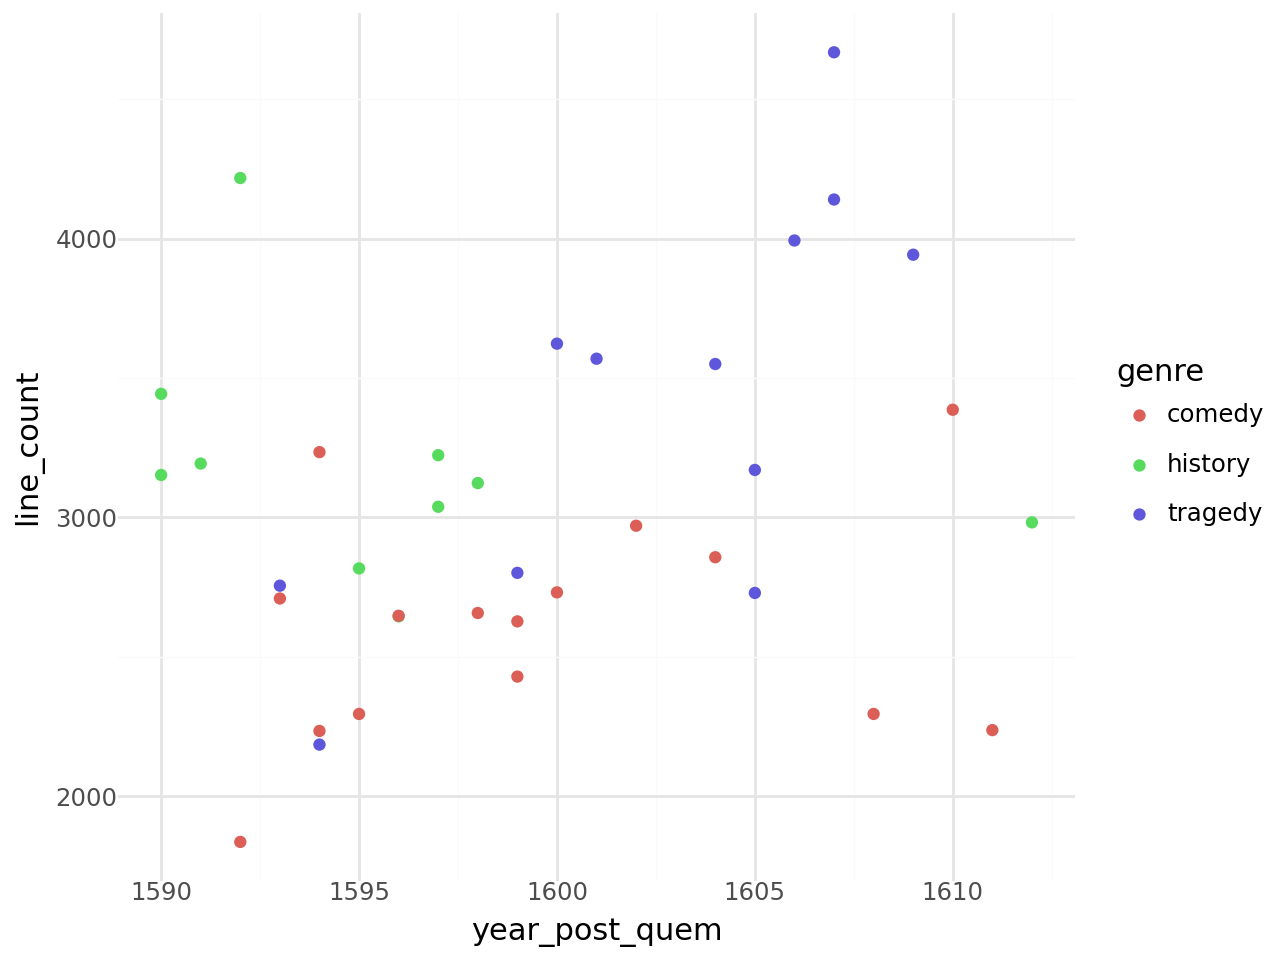

In [16]:
(
    ggplot(lines_per_play, aes("year_post_quem", "line_count"))
    + geom_point(aes(color="genre"))
)



Create a dataset called `lines_per_character` that counts the number of lines
for each character and joins in the metadata from the `people` dataset. Note that
you need to use two variables for the grouping and merging.



In [33]:
lines_per_character = (
    lines
    .groupby(["play","full_name"])
    .agg(
        char_line_count = ("full_name", "count")
    )
    .merge(people, on=["play","full_name"])
)
lines_per_character.head(10)

,play,full_name,char_line_count,short_name,gender
0,All's Well That Ends Well,An Old Widow of Florence,67,WID.,female
1,All's Well That Ends Well,"Bertram, Count of Roussillon",281,BER.,male
2,All's Well That Ends Well,Countess of Roussillon,185,COUNT.,female
3,All's Well That Ends Well,Countess's Page,2,PAGE.,male
4,All's Well That Ends Well,Diana,138,DIA.,female
5,All's Well That Ends Well,Duke of Florence,19,DUKE.,male
6,All's Well That Ends Well,First French Lord,6,1. LORD.,male
7,All's Well That Ends Well,First French Lord Dumaine,122,1. LORD. DUM.,male
8,All's Well That Ends Well,First Soldier as Interpreter,84,1. SOLD. AS INTERPRETER.,male
9,All's Well That Ends Well,Fourth French Lord,3,4. LORD.,male




Starting with the `lines_per_character` dataset you created above, create a table
showing the character from each play that has the highest number of lines. Save the
result as a dataset `protagonist`



In [35]:
protagonists = (
    lines_per_character
    .sort_values("char_line_count", ascending = False)
    .groupby("play")
    .agg(
        max_lines = ("char_line_count", "max"),
        protagonist = ("full_name", "first")
    )
    .reset_index()
)
protagonists

,play,max_lines,protagonist
0,All's Well That Ends Well,480,Helena
1,Antony and Cleopatra,836,Mark Antony
2,As You Like It,666,Rosalind
3,Comedie of Errors,400,Antipholus of Syracuse
4,Coriolanus,868,Caius Martius
5,Cymbeline,528,Imogen
6,Hamlet,1367,Hamlet
7,"Henry IV, Pt. 1",599,Sir John Falstaff
8,"Henry IV, Pt. 2",615,Sir John Falstaff
9,Henry V,1170,King Henry the Fifth




## Analysis II

If you have time, try this final question. Compute the percentage of lines spoken
within each play of the dominant protagonist.

Hint: You can use this code to compute the percentage to avoid the Google Colab issue
with division in .eval: `.eval("percentage = count_x * (count_y * 1.0)**(-1) * 100")`.



In [38]:
(
    protagonists
    .merge(lines_per_play, on="play")
    .eval("percentage = max_lines * (line_count * 1.0)**(-1) * 100")
)

,play,max_lines,protagonist,line_count,genre,year_post_quem,year_ante_quem,problem_play,percentage
0,All's Well That Ends Well,480,Helena,2970,comedy,1602,1603,1,16.161616
1,Antony and Cleopatra,836,Mark Antony,3993,tragedy,1606,1607,0,20.936639
2,As You Like It,666,Rosalind,2627,comedy,1599,1600,0,25.352113
3,Comedie of Errors,400,Antipholus of Syracuse,1836,comedy,1592,1593,0,21.786492
4,Coriolanus,868,Caius Martius,4140,tragedy,1607,1608,0,20.966184
5,Cymbeline,528,Imogen,3942,tragedy,1609,1610,1,13.394216
6,Hamlet,1367,Hamlet,3623,tragedy,1600,1601,0,37.731162
7,"Henry IV, Pt. 1",599,Sir John Falstaff,3038,history,1597,1598,0,19.716919
8,"Henry IV, Pt. 2",615,Sir John Falstaff,3223,history,1597,1598,0,19.081601
9,Henry V,1170,King Henry the Fifth,3123,history,1598,1599,0,37.463977
